In [37]:
import uproot
import mplhep as hep
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from plotting import plot_utils

In [41]:
f = uproot.open("gen_study_2.root")
print(f.keys())

['HT_VHToNonbb_M125_TuneCP5_13TeV;1', 'PT_VHToNonbb_M125_TuneCP5_13TeV;1', 'ETA_VHToNonbb_M125_TuneCP5_13TeV;1', 'HT_WminusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8;1', 'PT_WminusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8;1', 'ETA_WminusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8;1', 'HT_WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8;1', 'PT_WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8;1', 'ETA_WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8;1', 'HT_WSUEP_WToLNu_T3p00_TuneCP5_13TeV_pythia8;1', 'PT_WSUEP_WToLNu_T3p00_TuneCP5_13TeV_pythia8;1', 'ETA_WSUEP_WToLNu_T3p00_TuneCP5_13TeV_pythia8;1']


In [42]:
ptbinned = [
    "WJetsToLNu_Pt-100To250_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8",
    "WJetsToLNu_Pt-250To400_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8",
    "WJetsToLNu_Pt-400To600_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8",
    "WJetsToLNu_Pt-600ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8",
]
htbinned = [
    'WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphMLM-pythia8',
    'WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8',
    'WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8',
    'WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8',
    'WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8',
    'WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8',
    'WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8',
    'WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8',
]

signal = [
    'WSUEP_WToLNu_T3p00_TuneCP5_13TeV_pythia8'
]
VH = [
    'VHToNonbb_M125_TuneCP5_13TeV'
]
WH = [
    'WminusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8',
    'WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8'
]

(0.0, 800.0)

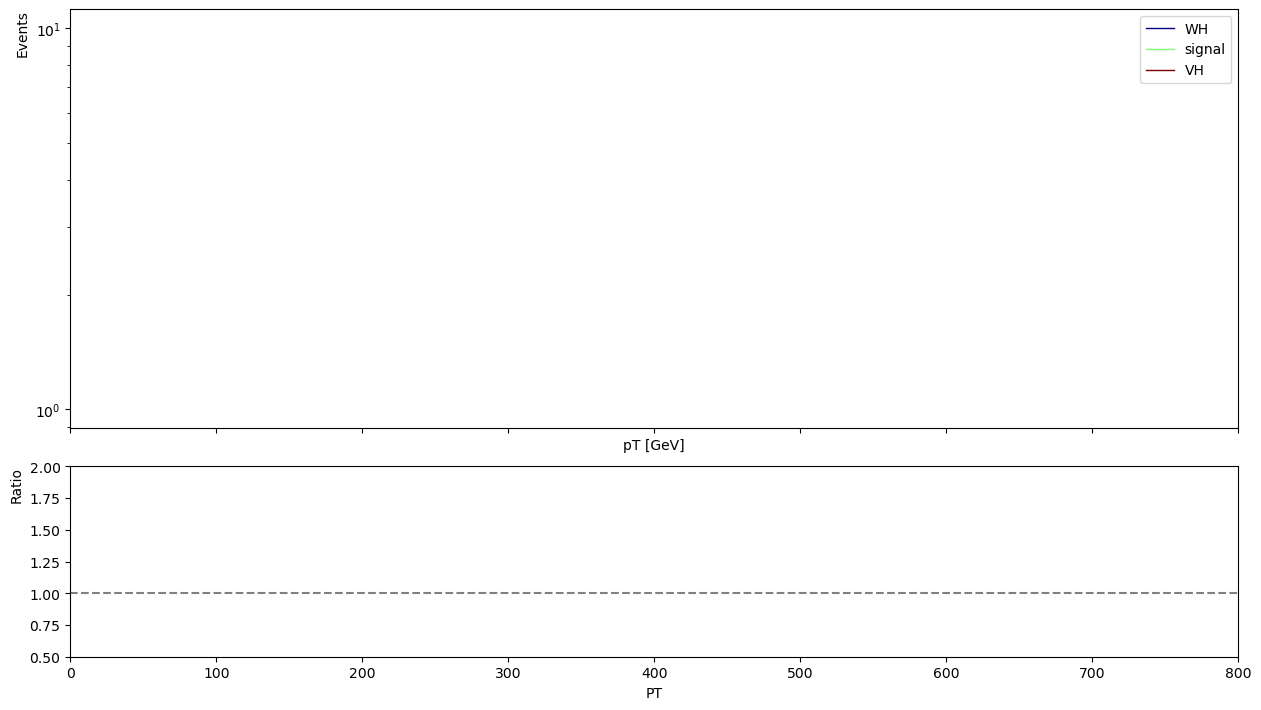

In [47]:
for i, s in enumerate(WH):
    if i == 0:
        h_WH = f['PT_'+s].to_hist()
    else:
        h_WH += f['PT_'+s].to_hist()

for i, s in enumerate(signal):
    if i == 0:
        h_signal = f['PT_'+s].to_hist()
    else:
        h_signal += f['PT_'+s].to_hist()

for i, s in enumerate(VH):
    if i == 0:
        h_VH = f['PT_'+s].to_hist()
    else:
        h_VH += f['PT_'+s].to_hist()

fig, axs = plot_utils.plot_ratio(
    [h_WH[::10j], h_signal[::10j], h_VH[::10j]],
    labels=["WH", "signal", "VH"], density=True)
axs[1].set_ylim(0.5, 2.0)
axs[0].set_xlabel("pT [GeV]")
axs[0].set_ylim(1e-5, 5e-1)
axs[0].set_xlim(0, 800)

(1e-05, 0.5)

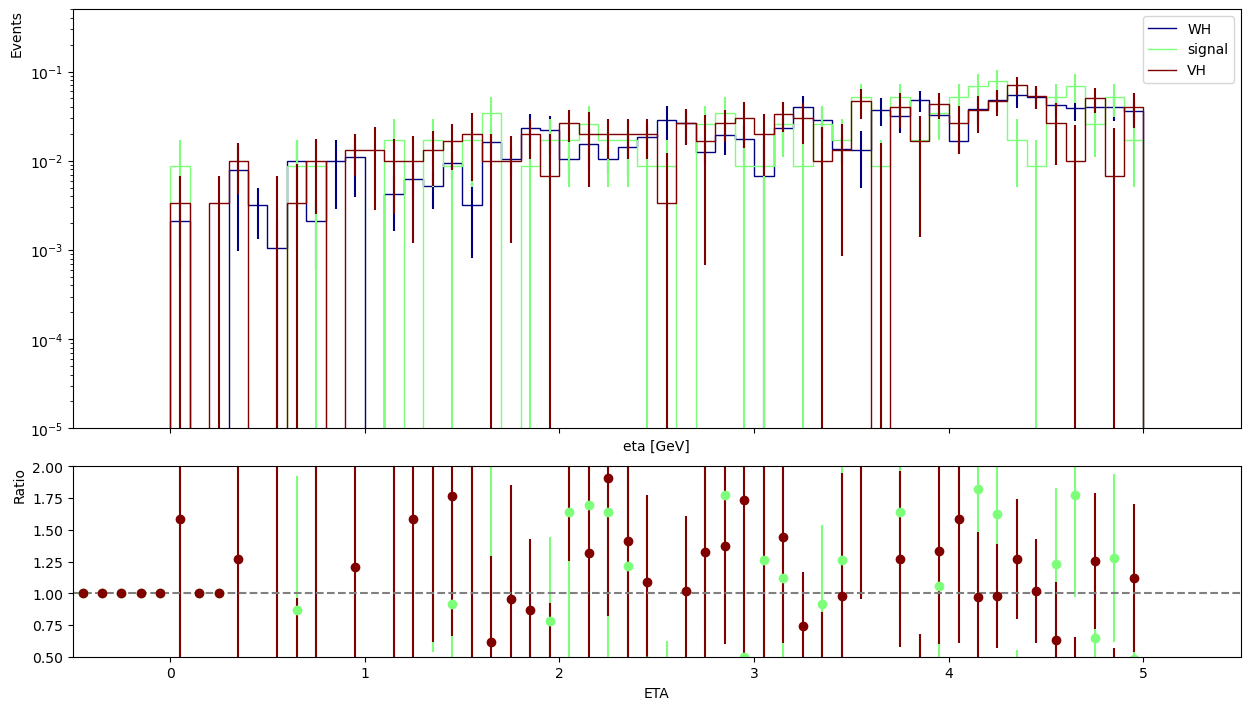

In [45]:
for i, s in enumerate(WH):
    if i == 0:
        h_WH = f['ETA_'+s].to_hist()
    else:
        h_WH += f['ETA_'+s].to_hist()

for i, s in enumerate(signal):
    if i == 0:
        h_signal = f['ETA_'+s].to_hist()
    else:
        h_signal += f['ETA_'+s].to_hist()

for i, s in enumerate(VH):
    if i == 0:
        h_VH = f['ETA_'+s].to_hist()
    else:
        h_VH += f['ETA_'+s].to_hist()

fig, axs = plot_utils.plot_ratio(
    [h_WH[::100j], h_signal[::100j], h_VH[::100j]],
    labels=["WH", "signal", "VH"], density=True)
axs[1].set_ylim(0.5, 2.0)
axs[0].set_xlabel("eta [GeV]")
axs[0].set_ylim(1e-5, 5e-1)

Text(0.5, 0, 'HT [GeV]')

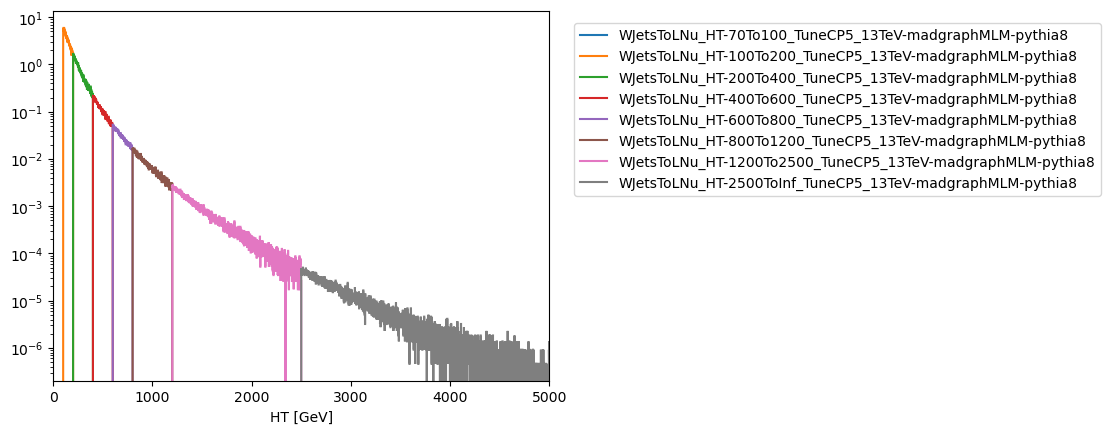

In [49]:
hep.histplot([f['HT_'+s] for s in htbinned], label=htbinned, yerr=False)
plt.yscale('log')
plt.xlim(0,5000)
plt.legend(loc=((1.05,0.5)))
plt.xlabel("HT [GeV]")

Text(0.5, 0, 'pT [GeV]')

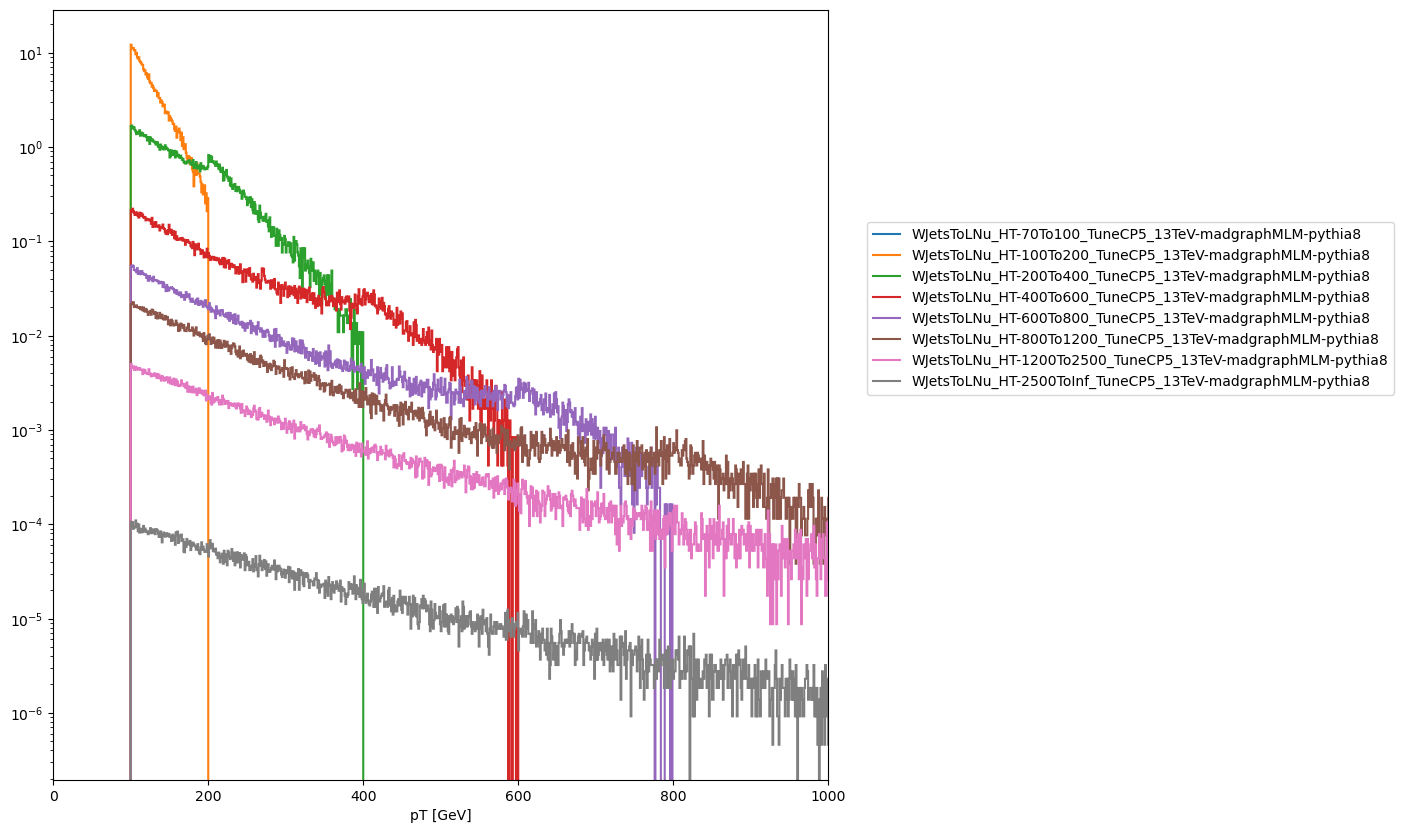

In [70]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
hep.histplot([f['PT_'+s] for s in htbinned], label=htbinned, yerr=False, ax=ax)
ax.set_yscale('log')
ax.set_xlim(0,1000)
ax.legend(loc=((1.05,0.5)))
ax.set_xlabel("pT [GeV]")

(1e-05, 200.0)

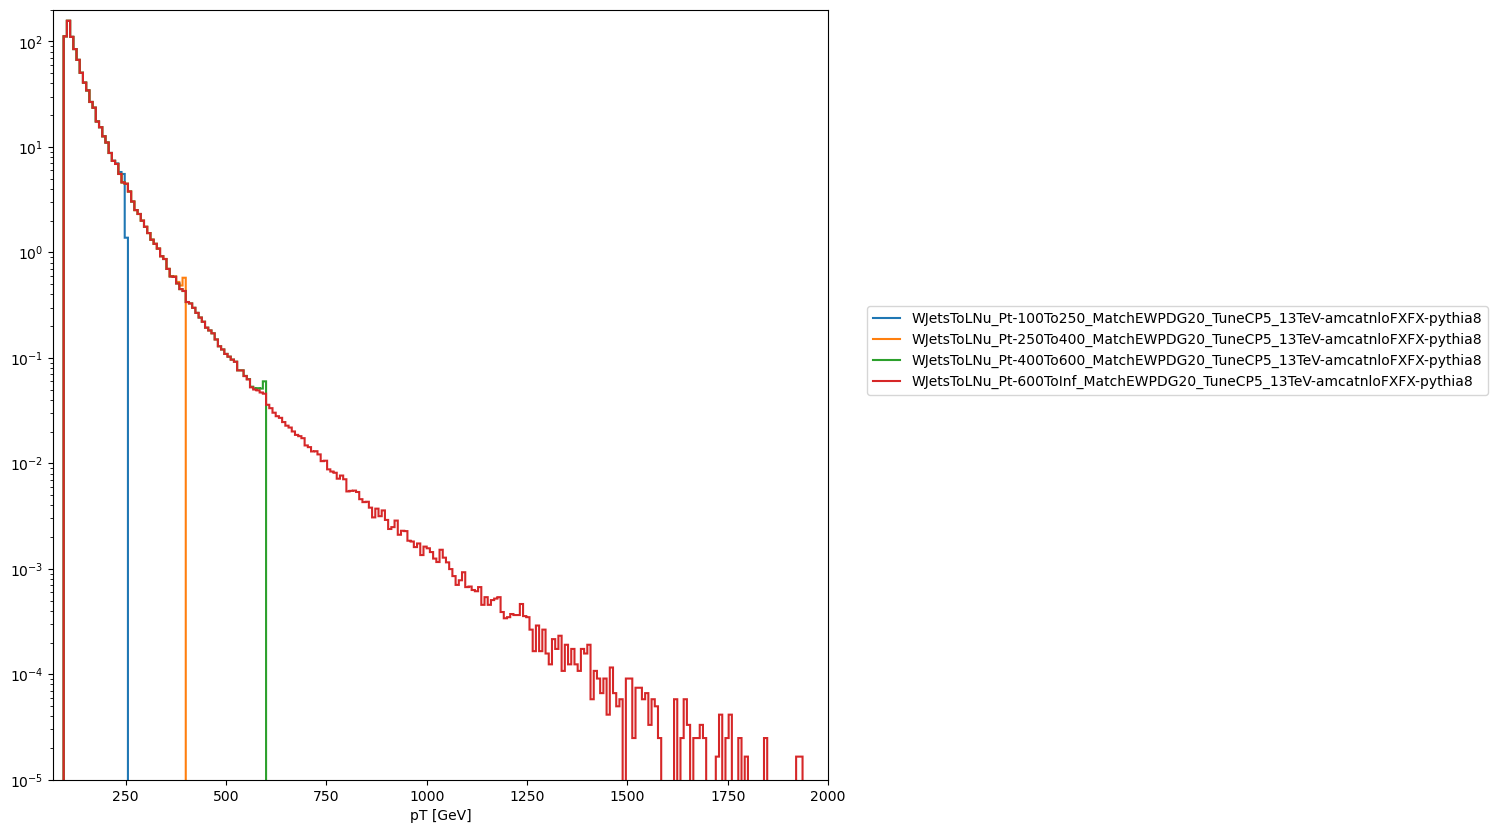

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
hep.histplot([f['PT_'+s].to_hist()[::8j] for s in ptbinned], label=ptbinned, stack=True, histtype='step', yerr=False, ax=ax)
ax.set_yscale('log')
ax.legend(loc=((1.05,0.5)))
ax.set_xlabel('pT [GeV]')
ax.set_xlim(70,2000)
ax.set_ylim(1e-5,2e2)
#ax.set_ylim(1e-5,1e2)

(1e-05, 100.0)

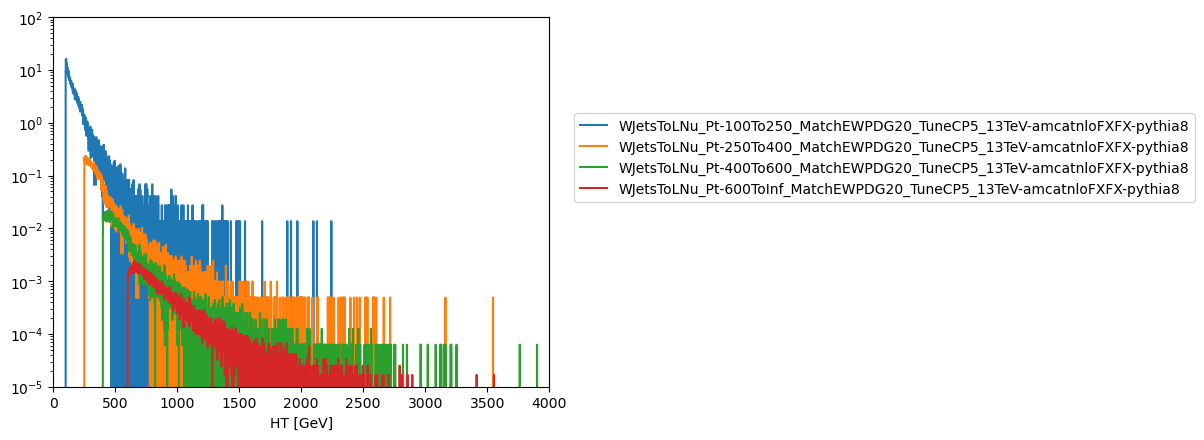

In [64]:
hep.histplot([f['HT_'+s] for s in ptbinned], label=ptbinned, yerr=False)
plt.yscale('log')
plt.xlim(0,4000)
plt.legend(loc=((1.05,0.5)))
plt.xlabel('HT [GeV]')
plt.ylim(1e-5,1e2)

Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')
Regular(10000, 0, 10000, name='PT', label='PT')


/home/submit/lavezzo/SUEP/SUEPCoffea_dask/plotting/plot_utils.py:739: RuntimeWarning: divide by zero encountered in power
  (hlist[0].values() ** -2) * (h.variances())
/home/submit/lavezzo/SUEP/SUEPCoffea_dask/plotting/plot_utils.py:739: RuntimeWarning: invalid value encountered in multiply
  (hlist[0].values() ** -2) * (h.variances())
/home/submit/lavezzo/SUEP/SUEPCoffea_dask/plotting/plot_utils.py:740: RuntimeWarning: divide by zero encountered in power
  + (h.values() ** 2 * hlist[0].values() ** -4) * (hlist[0].variances())
/home/submit/lavezzo/SUEP/SUEPCoffea_dask/plotting/plot_utils.py:740: RuntimeWarning: invalid value encountered in multiply
  + (h.values() ** 2 * hlist[0].values() ** -4) * (hlist[0].variances())


(0.0, 1500.0)

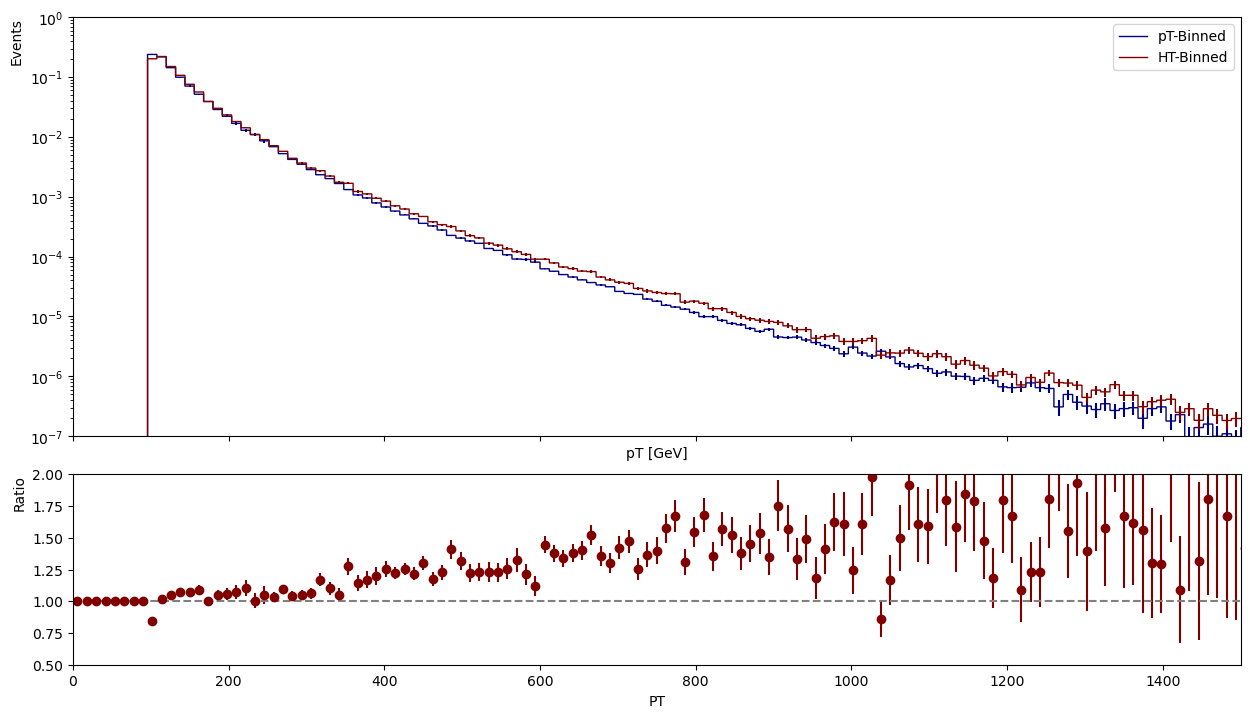

In [87]:
for i, s in enumerate(htbinned):
    if i == 0:
        htbinned_pt = f['PT_'+s].to_hist()
    else:
        print(htbinned_pt.axes[0])
        print(f['PT_'+s].to_hist().axes[0])
        htbinned_pt += f['PT_'+s].to_hist()

for i, s in enumerate(ptbinned):
    if i == 0:
        ptbinned_pt = f['PT_'+s].to_hist()
    else:
        ptbinned_pt += f['PT_'+s].to_hist()

fig, axs = plot_utils.plot_ratio([ptbinned_pt[::12j], htbinned_pt[::12j]], labels=["pT-Binned", "HT-Binned"], density=True)
axs[1].set_ylim(0.5, 2.0)
axs[0].set_xlabel("pT [GeV]")
axs[0].set_ylim(1e-7, 1e-0)
axs[0].set_xlim(0, 1500)

Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')
Regular(20000, 0, 20000, name='HT', label='HT')


(0.0, 3500.0)

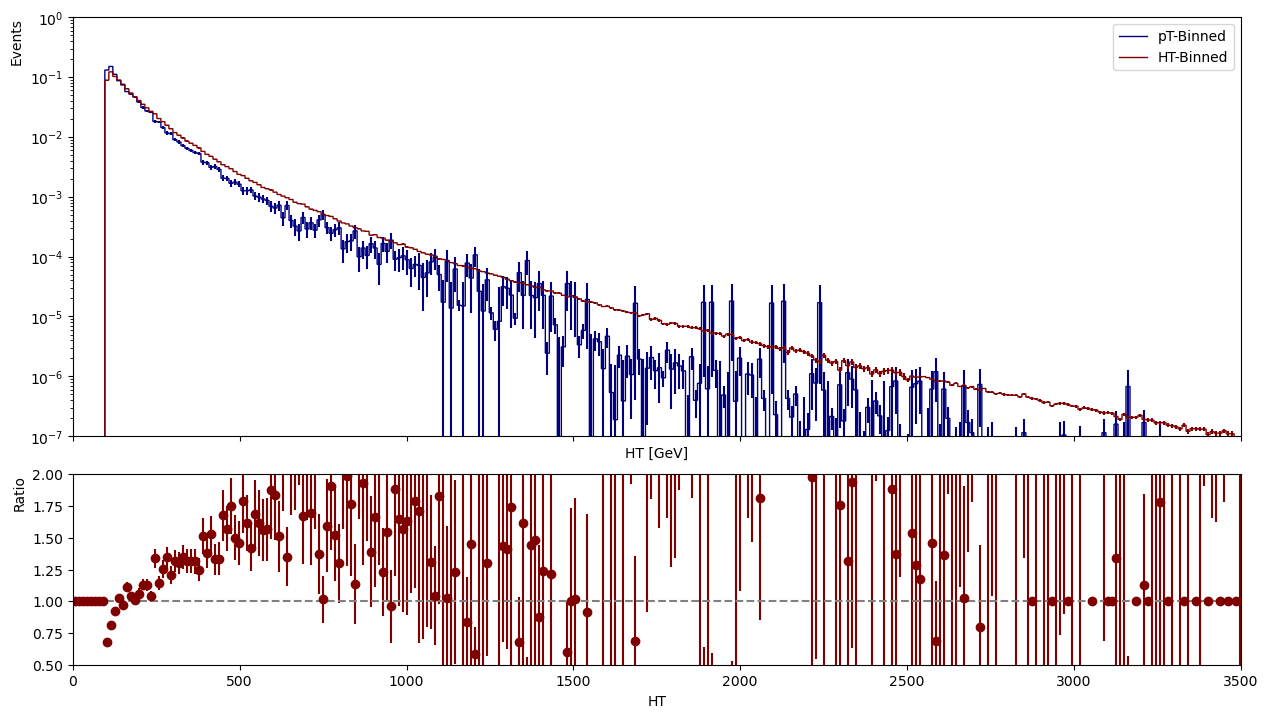

In [90]:
for i, s in enumerate(htbinned):
    if i == 0:
        htbinned_ht = f['HT_'+s].to_hist()
    else:
        print(htbinned_ht.axes[0])
        print(f['HT_'+s].to_hist().axes[0])
        htbinned_ht += f['HT_'+s].to_hist()

for i, s in enumerate(ptbinned):
    if i == 0:
        ptbinned_ht = f['HT_'+s].to_hist()
    else:
        ptbinned_ht += f['HT_'+s].to_hist()

fig, axs = plot_utils.plot_ratio([ptbinned_ht[::12j], htbinned_ht[::12j]], labels=["pT-Binned", "HT-Binned"], density=True)
axs[1].set_ylim(0.5, 2.0)
axs[0].set_xlabel("HT [GeV]")
axs[0].set_ylim(1e-7, 1e-0)
axs[0].set_xlim(0, 3500)

/home/submit/lavezzo/SUEP/SUEPCoffea_dask/plotting/plot_utils.py:739: RuntimeWarning: divide by zero encountered in power
  (hlist[0].values() ** -2) * (h.variances())
/home/submit/lavezzo/SUEP/SUEPCoffea_dask/plotting/plot_utils.py:739: RuntimeWarning: invalid value encountered in multiply
  (hlist[0].values() ** -2) * (h.variances())
/home/submit/lavezzo/SUEP/SUEPCoffea_dask/plotting/plot_utils.py:740: RuntimeWarning: divide by zero encountered in power
  + (h.values() ** 2 * hlist[0].values() ** -4) * (hlist[0].variances())
/home/submit/lavezzo/SUEP/SUEPCoffea_dask/plotting/plot_utils.py:740: RuntimeWarning: invalid value encountered in multiply
  + (h.values() ** 2 * hlist[0].values() ** -4) * (hlist[0].variances())


(0.5, 1.5)

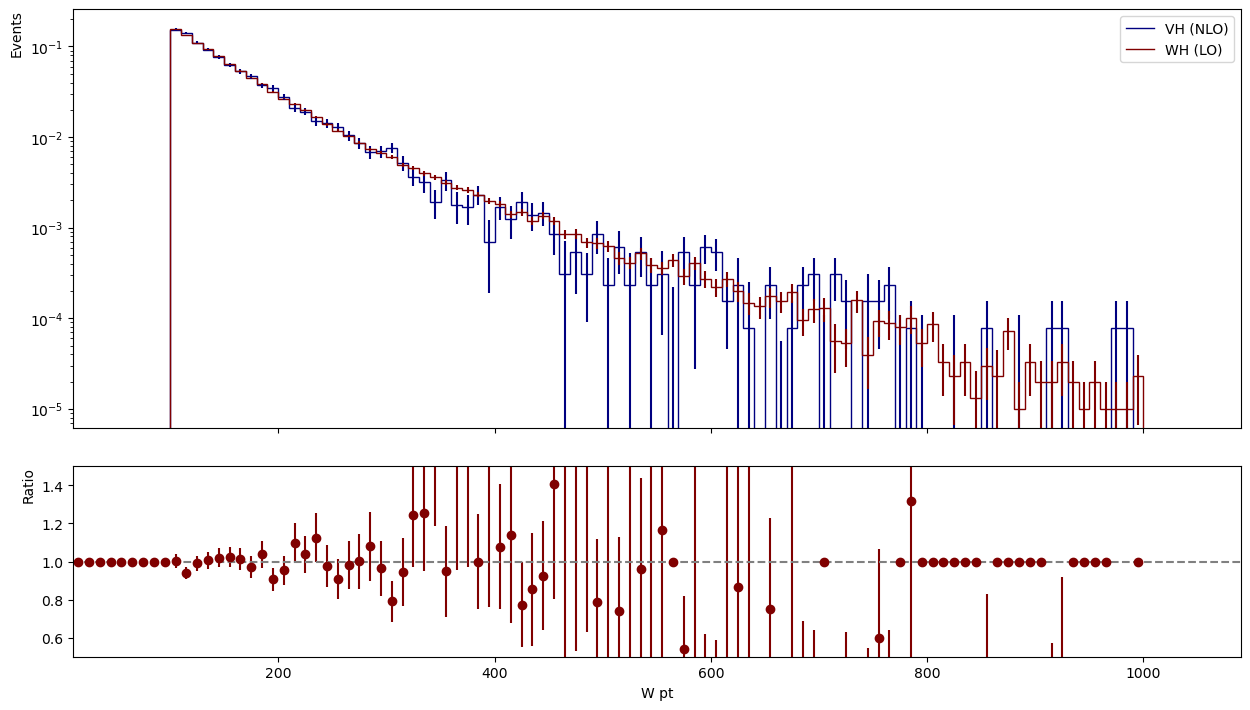

In [9]:
fig, axes = plot_utils.plot_ratio([h_vh[::10j], h_wh[::10j]], labels=["VH (NLO)", "WH (NLO)"], density=True)
axes[1].set_ylim(0.5,1.5)